# Trabajo Data Science - Reyna Gabriel

In [1260]:
import pandas                   as pd
from   scipy import stats
import seaborn                  as sns
import matplotlib               as mpl
import matplotlib.pyplot        as plt
import matplotlib.patheffects   as path_effects
import numpy                    as np
import chart_studio.plotly      as py
import statsmodels.formula.api  as sm
import missingno                as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble           import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import os

from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

## Introducción

**Contexto empresarial** 

Un gerente de negocios de una cartera de tarjetas de crédito para consumidores se enfrenta al problema de la pérdida de clientes. Quiere analizar los datos para descubrir la razón detrás de esto y aprovecharlo para predecir qué clientes tienen más probabilidades de abandonar.

**Objetivos**

En este proyecto se intentará extraer del conjunto de datos el comportamiento de ciertos clientes del banco. Con el fin de proporcionar a los departamentos pertinentes la información que necesitan para comprender mejor a sus clientes. Asimismo, se buscará predecir quiénes se darán de baja para poder acercarse al cliente de manera proactiva, ofrecerles mejores servicios y revertir sus decisiones en la dirección opuesta. Se busca identificar patrones y tendencias que pueden ayudar a los bancos a mejorar sus estrategias de retención de clientes y reducir la tasa de abandono del banco.

**Contexto analítico** 

Se proporciona un archivo CSV que consta de 10.000 clientes que mencionan su edad, salario, estado civil, límite de la tarjeta de crédito, categoría de la tarjeta de crédito, etc. Hay casi 18 características. Solo se proporciona el 16,07% de clientes que se han dado de baja.

Se realizarán las siguientes tareas con los datos:

-Leer, transformar y preparar datos para su visualización

-Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

**Problema comercial**

 Proporcionar visualizaciones que respondan las preguntas hipótesis planteadas en el apartado siguiente.

**Preguntas Hipótesis**

 En base a las primeras visualizaciones de la tabla csv de esta cartera de clientes, se plantean las siguientes hipótesis:

- ¿Cuál es el impacto del nivel educativo en el salario?
- ¿Existe alguna influencia del género en el salario y/o Limite de crédito?
- ¿Qué género tiene más probabilidades de abandonar el banco?
- ¿Los estudios superiores implican más responsabilidades con su cuenta?
- ¿Un mayor ingreso implica menos deudas?
- ¿Qué hace que una persona abandone el banco?


## Análisis de datos Exploratorio (EDA)

In [1261]:
url = 'https://raw.githubusercontent.com/GabyWesker/DataScienceProject/main/BankChurners.csv'
Bankchurners = pd.read_csv(url)
Bankchurners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


**Descripción de columnas:** 


**CLIENTUM:** Identificador único para cada cliente. (Int)

**Attrition_Flag:** Marca que indica si el cliente se ha ido o no.
(Booleano)

**Customer_Age:** Edad del cliente. (Int)

**Gender:** Genero del cliente. (String)

**Dependent_count:** número de dependientes que tiene el cliente. (Int)

**Education_Level:** Nivel de educación del cliente. (Sting)

**Marital_Status:** Estado civil. (String)

**Income_Category:** categoría de ingresos. (String)

**Card_Category:** tipo de tarjeta del cliente. (String)

**Months_on_book:** Cuanto tiempo ha estado el cliente en los libros.
(Int)

**Total_Relationshop_Count:** Número total de relaciones que el cliente
tiene con el proveedor de la tarjeta de crédito. (Int)

**Months_Inactive_12_mon:** número de meses que el cliente ha estado
inactivo en los últimos 12 meses. (Int)

**Contacts_Count_12_mon:** Número de contactos que el cliente ha
tenido en los últimos doce meses. (Int)

**Credit_Limit:** Límite de crédito del cliente. (Int)

**Total_Revolving_Bal:** Saldo rotatorio total del cliente. (Int)

**Avg_Open_To_Buy:** Relación media de apertura comprar del cliente.
(Int)

**Tota_Amt_Chng_Q4_Q1:** Importe total cambiado del trimestre 4 al
trimestre 1. (Int)

**Total_Trans_Amt:** Importe total de la transacción. (Int)

**Total_Trans_Ct:** Recuento total de transacciones. (Int)

**Total_Ct_Chng_Q4_Q1:** El recuento total cambió del trimestre 4 al
trimestre 1 (Int)

**Avg_Utilization_Ratio:** Índice de utilización promedio del cliente.
(Int)

**Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Coun
t_12_mon_Dependent_count_Education_Level_Months_Inactive_12_
mon_1:** Clasificación Bayes para predecid si alguien abandonara o no
en función de características. (Int)

### **Preparacion Inicial**

**Drop de Columnas**

In [1262]:
Bankchurners = Bankchurners.drop(columns = ['CLIENTNUM', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
             )
Bankchurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

_En primera instancia se decidió hacer un drop de las columnas irrelevantes para el análisis en cuestión_

**Verificación Datos Nulos**

<Figure size 1000x800 with 0 Axes>

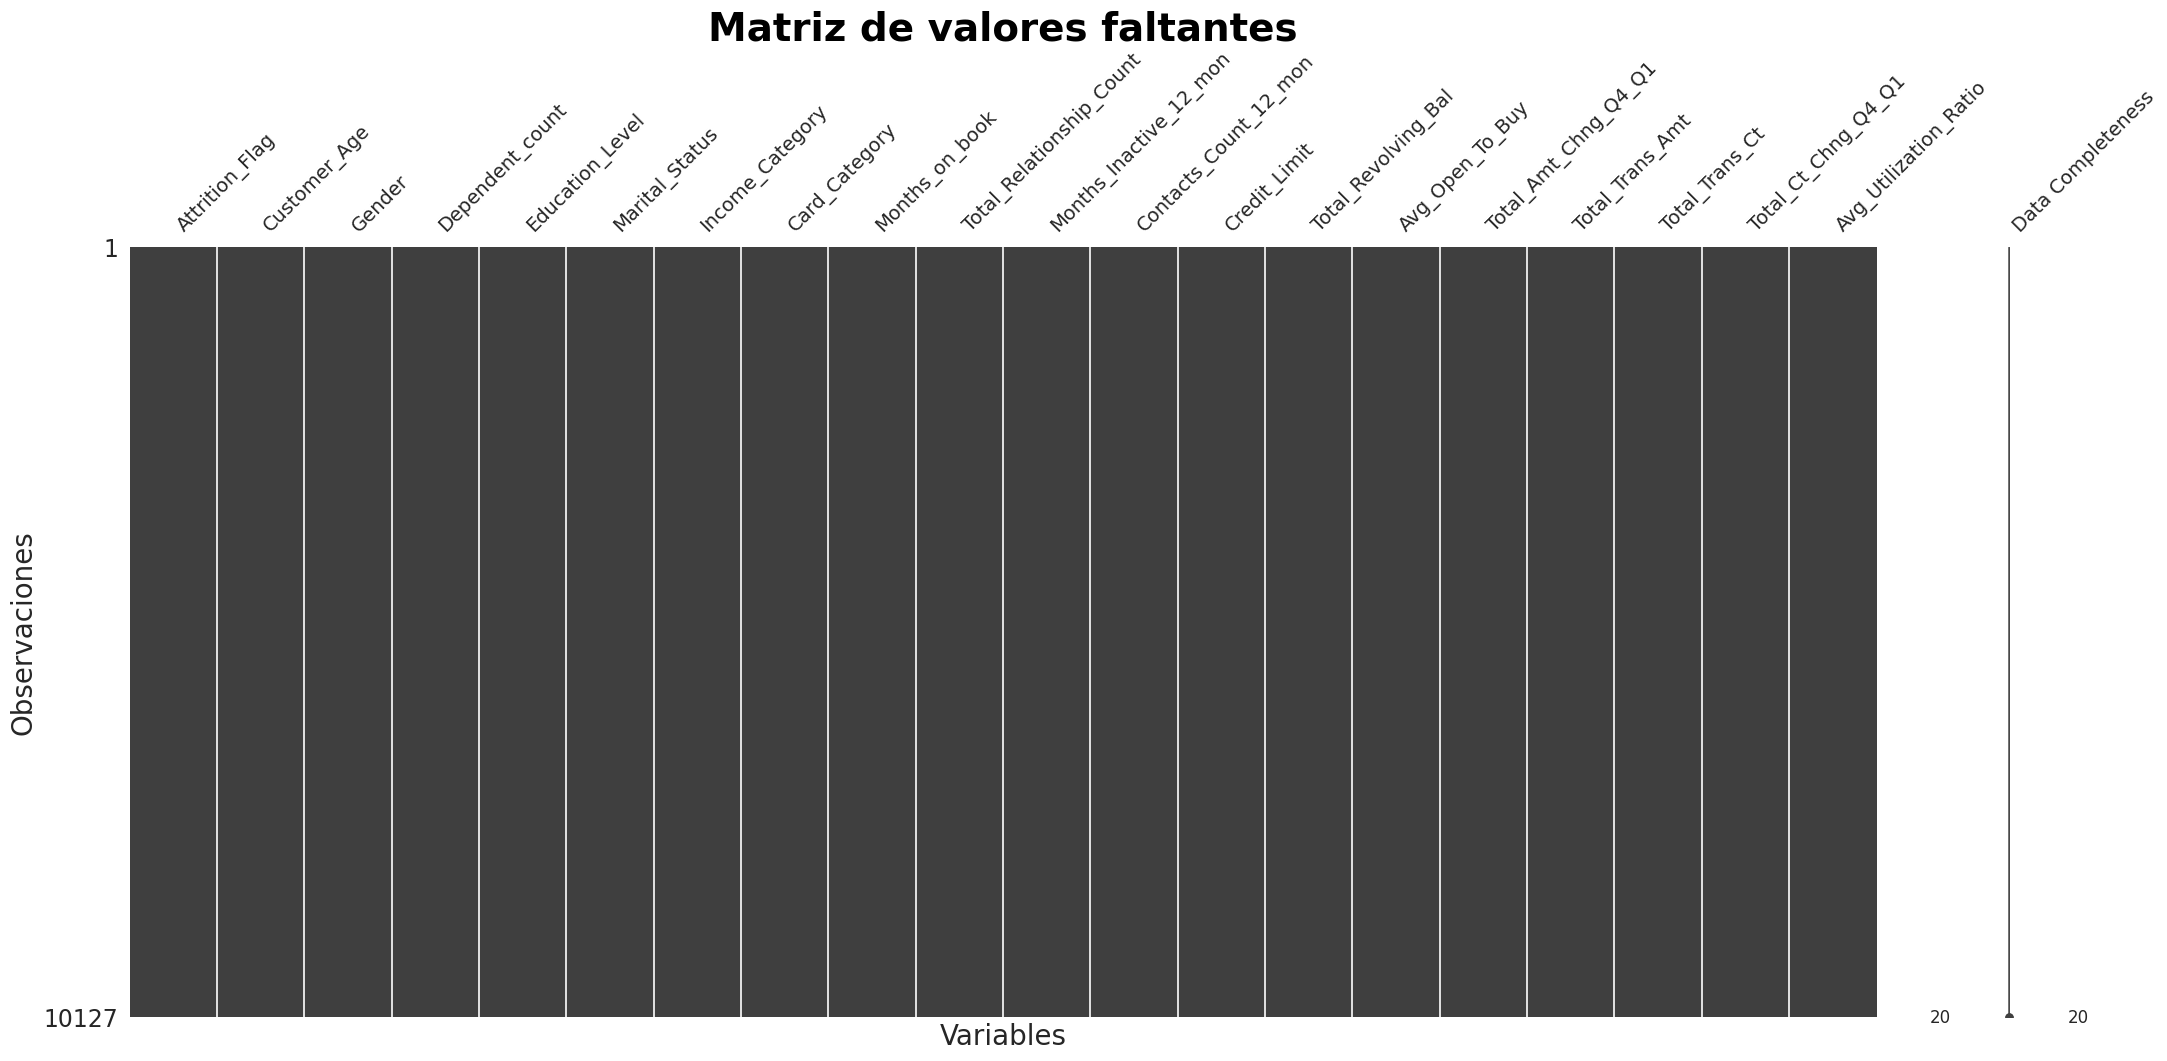

In [1263]:
plt.figure(figsize=(10,8))
msno.matrix(Bankchurners, fontsize=14, labels=True, sparkline=True)
plt.title('Matriz de valores faltantes', fontsize=28, fontweight='bold', color="black")
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
plt.show()

*Como se puede observar, el DF no tiene datos nulos o faltantes.*

**Verificación Duplicados**

In [1264]:
duplicados = Bankchurners.duplicated()
num_duplicados = sum(duplicados)
print('Número de filas duplicadas:', num_duplicados)

Número de filas duplicadas: 0


*Como se puede verificar, no hay filas duplicadas*

### **Análisis de variables categóricas**

**Columnas categóricas y numéricas**



In [1265]:
cat_col = [x for x in Bankchurners.columns if Bankchurners[x].dtype == 'O'] #categóricas que no contengan números
num_col = [x for x in Bankchurners.columns if x not in cat_col] #numéricas lo contrario.

print('Columnas_Categoricas : {} \n\
Columnas_Numericas : {}'.format(len(cat_col), len(num_col)))

Columnas_Categoricas : 6 
Columnas_Numericas : 14


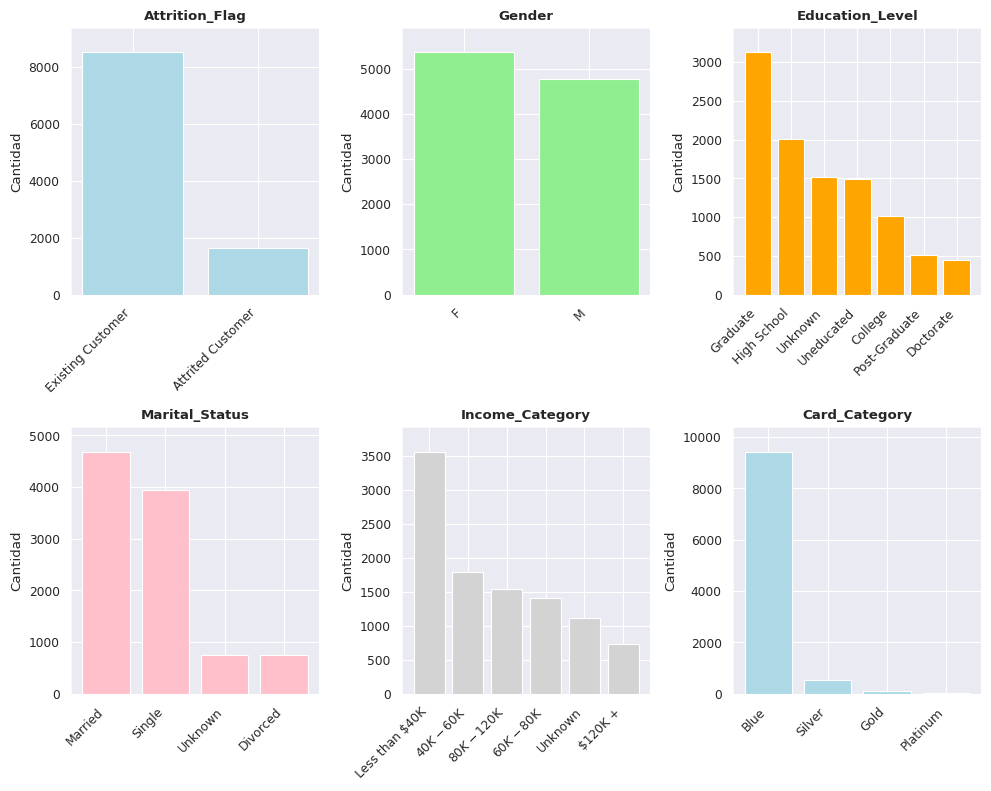

In [1266]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)


colors = ['lightblue', 'lightgreen', 'orange', 'pink', 'lightgray']

for i, var in enumerate(cat_col):
    tmp = Bankchurners[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var], color=colors[i % len(colors)])
    ax.set_title(var, fontweight='bold')
    ax.set_xticks(range(len(tmp['index'])))
    ax.set_xticklabels(tmp['index'], rotation=45, ha='right')
    ax.set_ylim(0, max(tmp[var]) * 1.1)
    ax.set_ylabel('Cantidad')

fig.tight_layout()
plt.show()


_Un breve análisis de las variables categóricas y su distribución en el dataset_

### **Análisis Nivel educacional**

**Distribución Educacional**

In [1267]:
Education_Counts = Bankchurners["Education_Level"].value_counts()

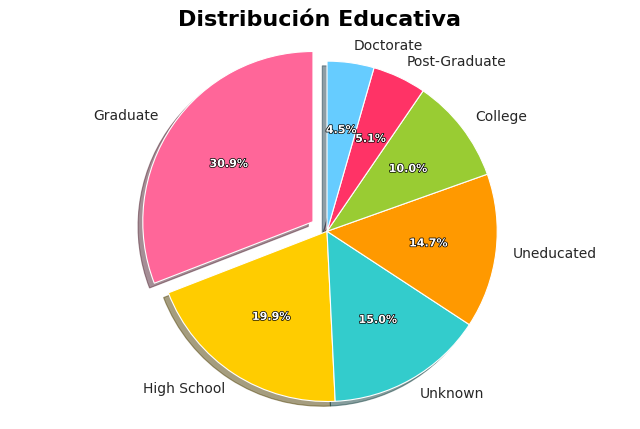

In [1268]:
fig, ax = plt.subplots(figsize=(8, 5))
explode = (0.1, 0, 0, 0, 0, 0, 0)

wedges, texts, autotexts = ax.pie(Education_Counts, 
                                  explode=explode, 
                                  labels=Education_Counts.index,
                                  autopct='%1.1f%%', 
                                  shadow=True,
                                  startangle=90,
                                  textprops={'fontsize': 10,},
                                  colors=['#FF6699', '#FFCC00', '#33CCCC', '#FF9900', '#99CC33', '#FF3366', '#66CCFF'])

# Configuración de etiquetas de porcentaje
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'), path_effects.Normal()])
    autotext.set_fontsize(8)

ax.set_title('Distribución Educativa', color='black', weight='bold', fontsize=16)
ax.axis('equal')
plt.show()

**Distribución Educacional en base a nivel de ingresos**

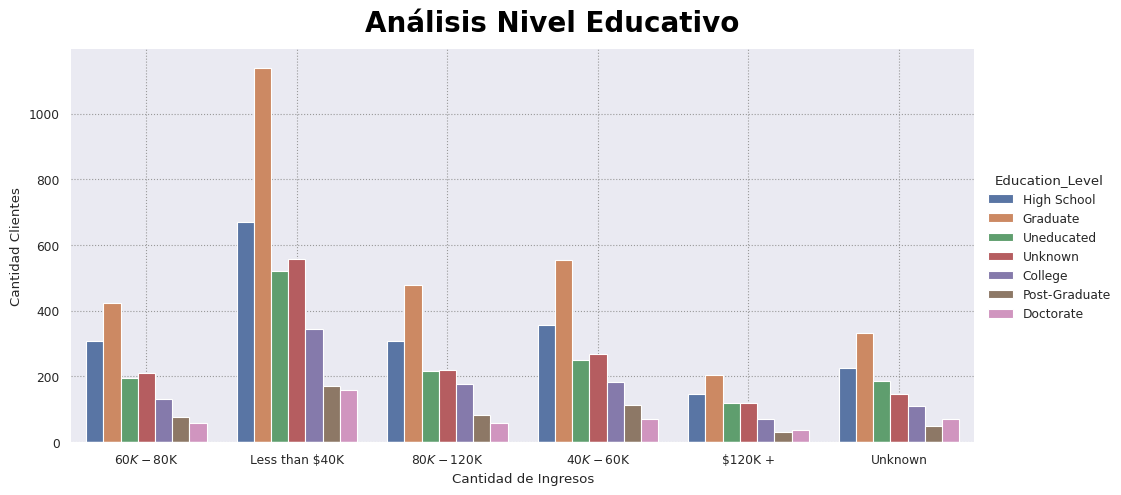

In [1269]:

sns.set_style("darkgrid")
sns.set_context("paper")

ax = sns.catplot(x="Income_Category", 
                 hue="Education_Level",
                 data=Bankchurners, 
                 kind="count",
                 height=5, aspect=2,
                 palette="deep"
                )

# Ajustes de diseño y título
ax.fig.subplots_adjust(top=.9)
ax.fig.suptitle('Análisis Nivel Educativo', color="black", weight="bold", fontsize=20)
ax.set(xlabel='Cantidad de Ingresos', ylabel='Cantidad Clientes')
ax.set_titles(col_template="{col_name}")

# Ajustes adicionales de estilo
ax.despine(left=True)
plt.grid(color='.6', linestyle=':')
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.linewidth'] = 0.5

# Mostrar el gráfico
plt.show()

_En el gráfico observado la cartera de clientes esta compuesta mayormente por clientes con ingresos menores a $40k y en su mayoría graduados_

**Influencia educacional en relación al banco**

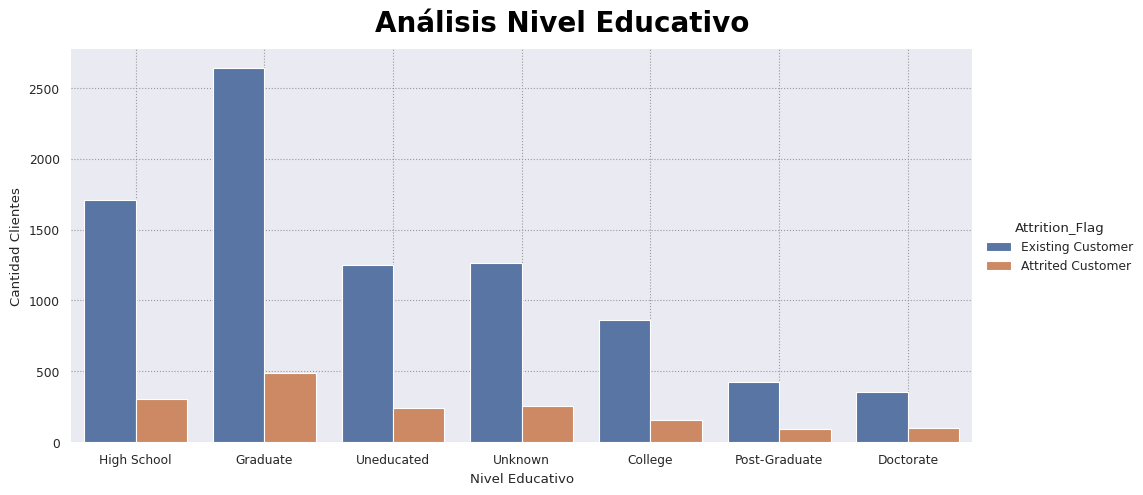

In [1270]:
ax = sns.catplot(x="Education_Level", 
                 hue="Attrition_Flag",
                 data=Bankchurners, 
                 kind="count",
                 height=5, aspect=2,
                 palette="deep"
                )

ax.fig.suptitle('Análisis Nivel Educativo', color="black", weight="bold", fontsize=20)
ax.fig.subplots_adjust(top=.9)
ax.set(xlabel='Nivel Educativo', ylabel='Cantidad Clientes')
ax.set_titles(col_template="{col_name}")
ax.despine(left=True)
plt.grid(color='.6', linestyle=':')
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.linewidth'] = 0.5
plt.show()

_En base al gráfico obtenido, no hay una marcada diferencia entre el nivel educativo del cliente y la relación con el banco. Se observan porcentajes similares en cada categoría._

### **Analisis Variable Edad**

**Edad media**

In [1271]:
Edad_Media = Bankchurners["Customer_Age"].mean()
Edad_Media_2 = round(Edad_Media, 2)

print("Edad Media:", Edad_Media_2, "Años")

Edad Media: 46.33 Años


**Rangos Cuartiles**

In [1272]:
q1 = Bankchurners['Customer_Age'].quantile(0.25)
q2 = Bankchurners['Customer_Age'].median()
q3 = Bankchurners['Customer_Age'].quantile(0.75)

iqr = q3 - q1

print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)
print("Rango intercuartil:", iqr)

Q1: 41.0
Q2: 46.0
Q3: 52.0
Rango intercuartil: 11.0


**Promedio Edades**

In [1273]:
age_mean = Bankchurners.groupby('Gender')['Customer_Age'].mean().round(2)
print("Promedio de edad Hombres:", age_mean['M'],"Años")
print("Promedio de edad Mujeres:", age_mean['F'],"Años")

Promedio de edad Hombres: 46.18 Años
Promedio de edad Mujeres: 46.46 Años


**Boxsplot variable edad**

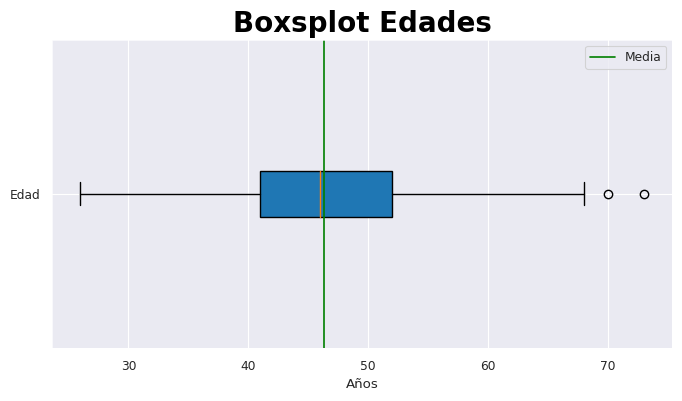

In [1274]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot(x=Bankchurners["Customer_Age"],
           patch_artist= True,
            vert= False,
            labels=["Edad"],
            )         
ax.set_title("Boxsplot Edades",
            color = "black", 
             weight = "bold", 
             fontsize=20,
             )
ax.set_xlabel('Años')
plt.axvline(x=Edad_Media, 
            color="g", 
            label="Media",
            )
plt.legend()
plt.show()

_Se Utilizo la línea verde por donde ocupa el valor la media_

In [1275]:
display(Bankchurners['Customer_Age'].skew().round(3))

-0.034

_Un sesgo (skewness) de -0.034 indica que la distribución de edades de los clientes en la columna 'Customer_Age' está ligeramente sesgada hacia la izquierda, aunque la asimetría es muy pequeña. Esto significa que hay ligeramente más valores en el extremo izquierdo de la distribución (edades más jóvenes) que en el extremo derecho (edades más viejas), pero en general la distribución parece bastante simétrica._

**Una mejor vista Grafica de la variable**

Text(0.5, 1.0, 'Cantidad clientes según edad')

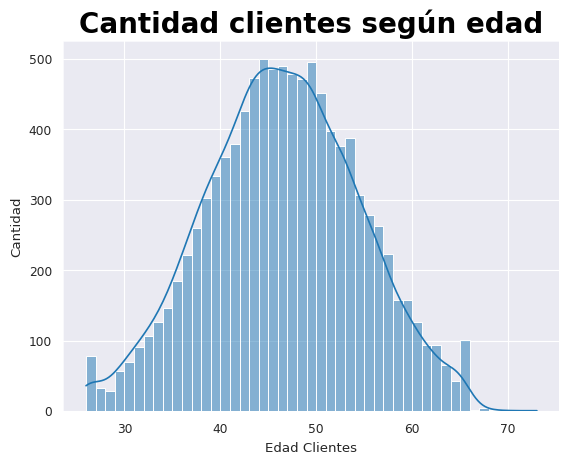

In [1276]:

ax = sns.histplot(Bankchurners.Customer_Age,kde=True,)
ax.set(xlabel='Edad Clientes', 
      ylabel='Cantidad')
ax.set_title("Cantidad clientes según edad",
            color = "black", 
             weight = "bold", 
             fontsize=20,
             )

In [1277]:
print(f"Desviacion Estandar: {Bankchurners['Customer_Age'].std().round(2)}"
      )

Desviacion Estandar: 8.02


_El resultado de la desviación estándar de las edades de los clientes es de 8.02 años aproximadamente. Esto sugiere que las edades de los clientes en la base de datos están relativamente agrupadas alrededor de la media (promedio) de las edades, pero aún hay cierta variabilidad en las edades de los clientes en la base de datos._

[Text(0.5, 0, 'Edad Clientes'), Text(0, 0.5, 'Cantidad')]

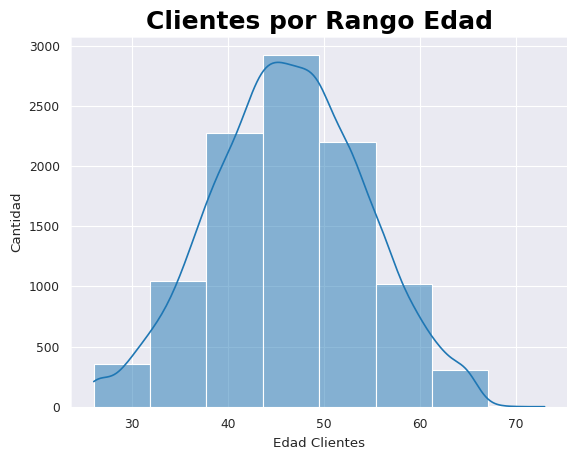

In [1278]:
ax = sns.histplot(Bankchurners.Customer_Age,
             kde=True, 
             bins=int(Bankchurners['Customer_Age'].std()),
             )
ax.set_title("Clientes por Rango Edad",
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.set(xlabel='Edad Clientes', 
      ylabel='Cantidad')

_Por lo que puede observarse en el histograma, entre los 40 a 50 años se encuentra la mayor cantidad de clientes (la media se encuentra en 46,32)_

In [1279]:
Bankchurners['Customer_Age_period'] = pd.cut(np.array(Bankchurners['Customer_Age']), 
                                              bins=int(Bankchurners.Customer_Age.std()),
                                              precision=0
                                              )

**Analisis Bivariado**

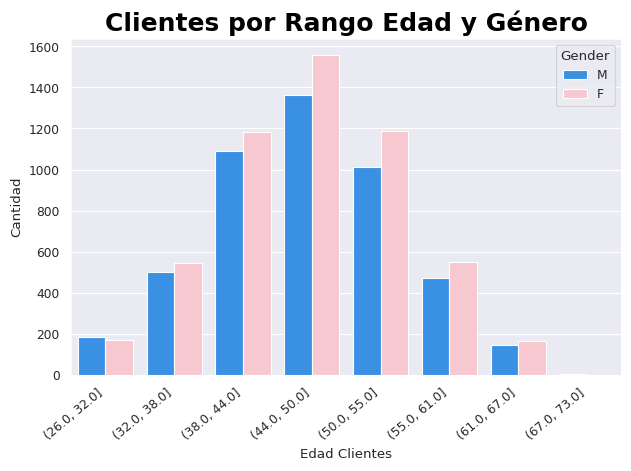

In [1280]:
ax = sns.countplot(x="Customer_Age_period", 
                    hue='Gender', 
                    data=Bankchurners,
                    palette=['dodgerblue',"pink"],
                    )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Clientes por Rango Edad y Género",
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.set(xlabel='Edad Clientes', 
      ylabel='Cantidad')
plt.tight_layout()

_Por medio de la gráfica se pueden observar una mayor cantidad de clientes sexo femenino en los rangos mas relevantes 38 a 55 años_

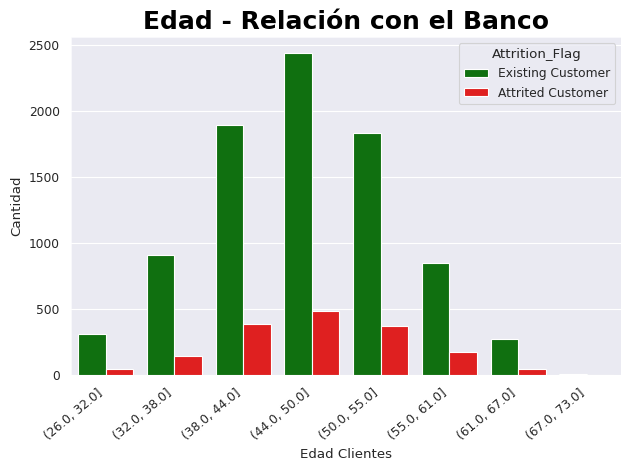

In [1281]:
ax = sns.countplot(x="Customer_Age_period", hue='Attrition_Flag', data=Bankchurners, palette=['green',"red"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Edad - Relación con el Banco",
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.set(xlabel='Edad Clientes', 
      ylabel='Cantidad')
plt.tight_layout()

_En el gráfico puede observarse que no hay tendencia de edad entre clientes existentes y ex-clientes. Es decir no es un parámetro relevante, ambos atributos del gráfico tienen el mismo comportamiento._

### **Análisis Variable Género**

In [1282]:
Edad_Genero = pd.crosstab(
    Bankchurners['Customer_Age'], 
    Bankchurners["Gender"].map({"M": "Hombre", "F": "Mujer"}), 
    margins = True, 
    margins_name = "Total",
    )

Edad_Genero.head()

Gender,Hombre,Mujer,Total
Customer_Age,,,
26,39,39,78
27,13,19,32
28,16,13,29
29,34,22,56
30,37,33,70


*Tabla Cruzada: Edad y Género. Para ver la cantidad de personas segun el genero en una edad determinada*

**Analisis Bivariado del Género**

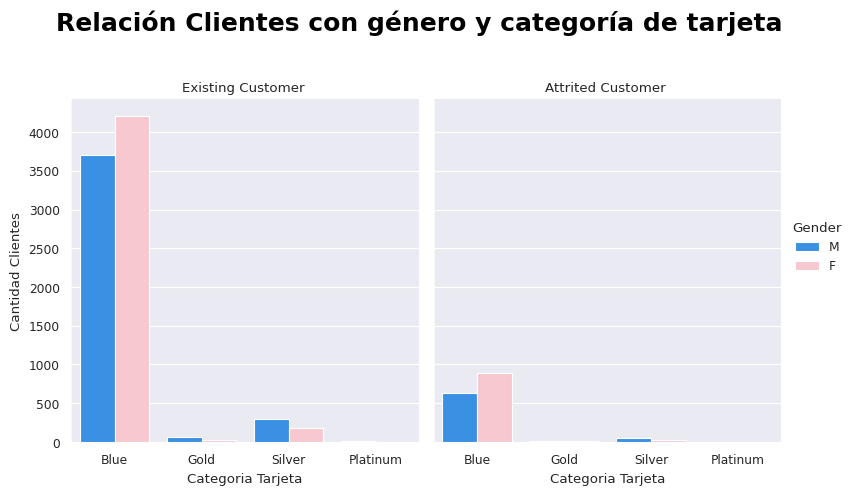

In [1283]:
ax = sns.catplot(x="Card_Category", 
                hue="Gender", 
                col="Attrition_Flag",
                data=Bankchurners, 
                kind="count",
                height=5, aspect=.8,
                palette=['dodgerblue',"pink"],
                )
ax.fig.suptitle('Relación Clientes con género y categoría de tarjeta',
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.fig.subplots_adjust(top=.8)
ax.set(xlabel='Categoria Tarjeta', 
      ylabel='Cantidad Clientes')
ax.set_titles(col_template="{col_name} ")

_Por lo que se observa en la gráfica, no hay un patron visible que pueda determinar si cierto tipo de tarjeta lleva al cliente a darse de baja en el banco_

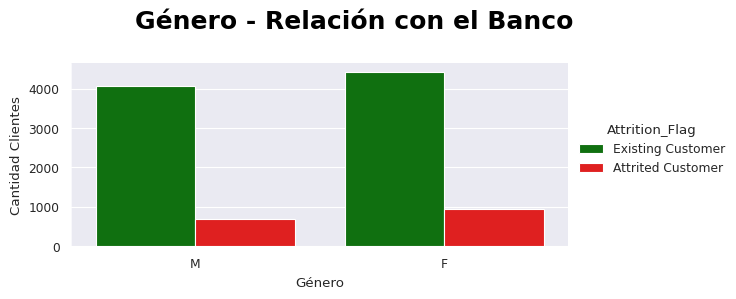

In [1284]:
ax = sns.catplot(x="Gender", 
                hue="Attrition_Flag",
                data=Bankchurners, 
                kind="count",
                height=3, aspect=2,
                palette=['green',"red"]
                )
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle('Género - Relación con el Banco',
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.fig.subplots_adjust(top=.8)
ax.set(ylabel='Cantidad Clientes',
       xlabel= "Género")
ax.set_titles(col_template="{col_name} ")

_Se observa que el porcentaje de mujeres y hombres que se retiran en la tarjeta es muy similar, no se puede concluir una relación en base al genero._

### **Análisis Variable Límite de crediticio**

[Text(0.5, 0, 'Edad Clientes'), Text(0, 0.5, 'Limite crediticio')]

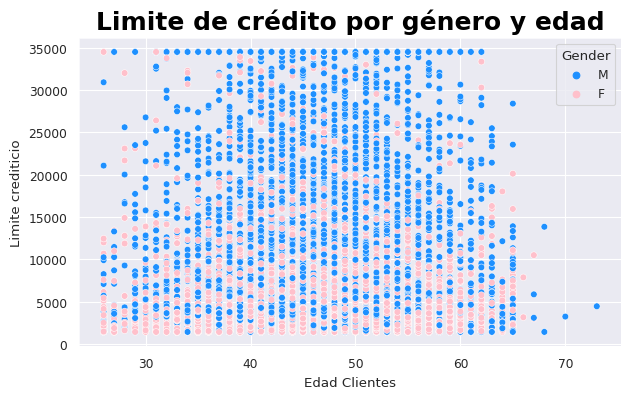

In [1285]:
fig, ax = plt.subplots(figsize=(7, 4))  
sns.scatterplot(x= Bankchurners['Customer_Age'], 
                y = Bankchurners['Credit_Limit'], 
                data=Bankchurners, 
                hue="Gender", 
                palette=['dodgerblue',"pink"],
                )
ax.set_title("Limite de crédito por género y edad",
            color = "black", 
             weight = "bold", 
             fontsize=18,
             )
ax.set(xlabel='Edad Clientes', 
      ylabel='Limite crediticio')


In [1286]:
Bankchurners['Gender'] = Bankchurners['Gender'].replace({'M': 'Hombre', 'F': 'Mujer'})
mean_credit_limit = Bankchurners.groupby('Gender')['Credit_Limit'].mean().round(2)
print(mean_credit_limit)

Gender
Hombre    12685.67
Mujer      5023.85
Name: Credit_Limit, dtype: float64


_En el gráfico puede observarse un patron a simple vista definido, que los hombres obtienen mayor limite de crédito que las mujeres._ 

_Luego haciendo un GruopBy claramente esta la diferencia, una mujer tiene como limite $5023 y un hombre $12685._

### **HeatMap entre 2 variables INT**

<Axes: >

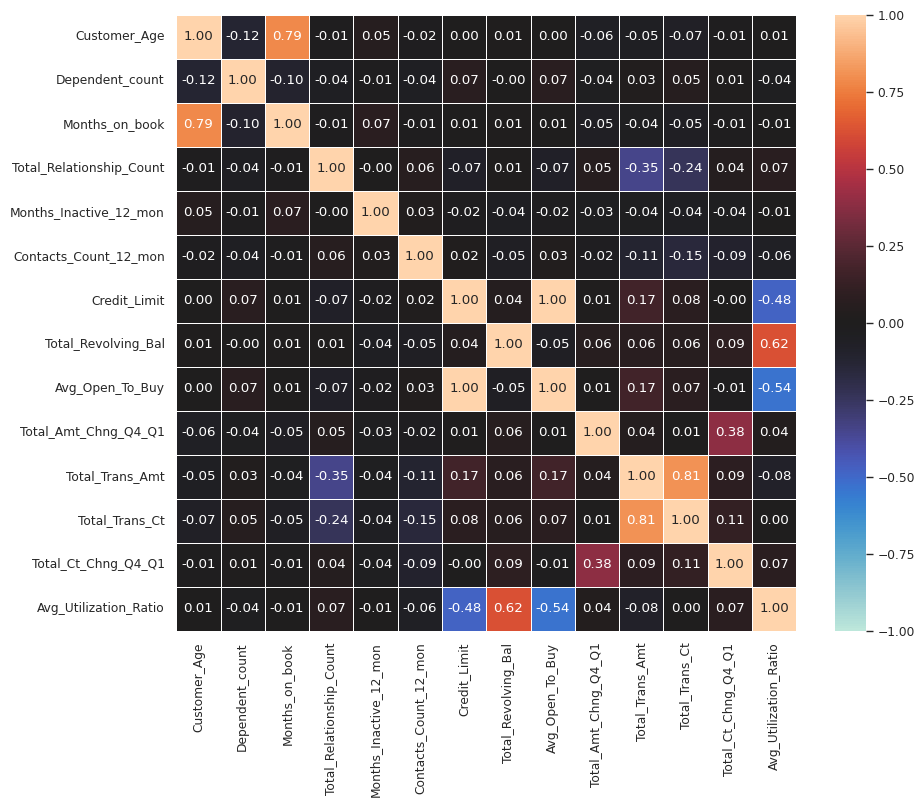

In [1287]:

plt.figure(figsize=(10,8))
sns.heatmap(Bankchurners[num_col].corr(), 
            vmin=-1.0, 
            vmax=1.0, 
            linewidths=0.5, 
            cmap='icefire', 
            annot=True, 
            fmt='.2f',
            )

_Por medio del heatmap puede observarse poca relacion entre variables numéricas (INT)._

#### **Relacion de edad - Meses operando**

Text(0, 0.5, 'Meses')

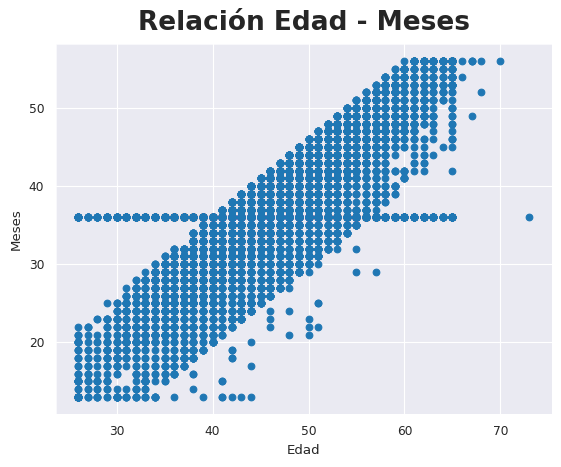

In [1288]:
plt.scatter(Bankchurners['Customer_Age'],Bankchurners['Months_on_book'])
plt.title("Relación Edad - Meses",
           fontsize=19, 
           verticalalignment='bottom', 
             weight = "bold",
           )
plt.xlabel("Edad")
plt.ylabel("Meses")

_Conclusión simple de dicho grafico de relacion entre la edad y los meses activos del cliente. Mientras mas edad tiene ese cliente tiende a tener mayor cantidad de meses operando con la tarjeta, de igualmanera pueden observarse pocos outliers._

#### **Relacion Cantidad de operaciones efectuadas segun comportamiento**

[Text(0.5, 0, 'Avg Utilization Ratio'), Text(0, 0.5, 'Total Revolving Ball')]

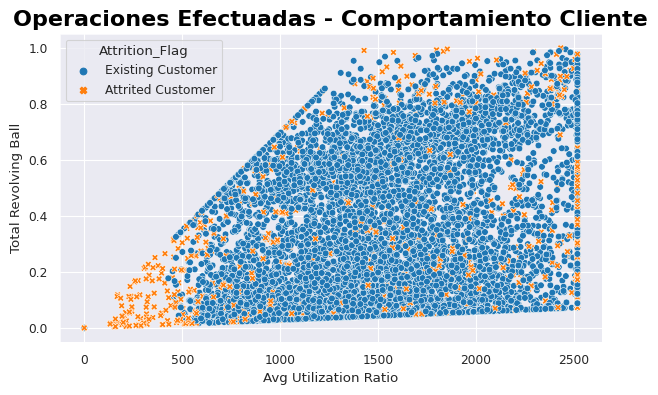

In [1289]:
fig, ax = plt.subplots(figsize=(7, 4))  
sns.scatterplot(x= Bankchurners['Total_Revolving_Bal'], 
                y = Bankchurners['Avg_Utilization_Ratio'],
                  data=Bankchurners,
                  hue="Attrition_Flag",
                  style="Attrition_Flag",
                  )
ax.set_title("Operaciones Efectuadas - Comportamiento Cliente",
            color = "black", 
             weight = "bold", 
             fontsize=16,
             )
ax.set(xlabel='Avg Utilization Ratio', 
      ylabel='Total Revolving Ball')

_En conclusion del scater bivariado, la tendencia que se puede observar es que en su mayoria los clientes que solicitan la baja de la tarjeta, tienen menos operaciones efectuadas en el ultimo tiempo._

##Abrol de decisión

### Preparación

In [1290]:
le = LabelEncoder()
Bankchurners['Marital_Status'] = le.fit_transform(Bankchurners['Marital_Status'])
Bankchurners['Attrition_Flag'] = le.fit_transform(Bankchurners['Attrition_Flag'])
Bankchurners['Gender'] = le.fit_transform(Bankchurners['Gender'])
Bankchurners['Education_Level'] = le.fit_transform(Bankchurners['Education_Level'])
Bankchurners['Card_Category'] = le.fit_transform(Bankchurners['Card_Category'])

_Lo primero que hice fue mediante labelencoder pasar las variables a numéricas. La columna Income_Category (Ingresos), se descarto, ya que son muchos valores diferentes e imposibilita el análisis._

In [1291]:
Bankchurners = Bankchurners.drop(columns=['Income_Category'])
Bankchurners = Bankchurners.drop(columns=['Customer_Age_period'])

_Se Hizo un drop de dicha columna y Customer_Age_period (que fue creada para analisis graficos)_

In [1292]:
X = Bankchurners.drop(['Attrition_Flag'], axis=1)
y = Bankchurners['Attrition_Flag']
# Divido los datos en características y variable objetivo (Y)

In [1293]:
Bankchurners.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,0,3,3,1,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,1,5,2,2,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,0,3,2,1,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,1,4,3,3,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,0,3,5,1,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


_Verificacion que toda la DB esta descripta en valores numéricos._

In [1294]:
# Entreno un modelo de bosque aleatorio para determinar la importancia de cada característica
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

_**n_estimators=100:** el número de árboles en el bosque aleatorio, en este caso se están utilizando 100 árboles._

_**random_state=42:** un valor utilizado para inicializar el generador de números aleatorios, lo que garantiza que se obtengan los mismos resultados cada vez que se ejecute el código con estos mismos parámetros._


### Reduccion dimensionalidad

Importancia de cada característica

In [1295]:
importances = rf.feature_importances_

In [1296]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

In [1297]:
feature_importances = feature_importances.sort_values('importance', ascending=False)

In [1298]:
print(feature_importances.round(4))

                     feature  importance
14           Total_Trans_Amt      0.1895
15            Total_Trans_Ct      0.1781
16       Total_Ct_Chng_Q4_Q1      0.1104
11       Total_Revolving_Bal      0.1083
7   Total_Relationship_Count      0.0654
13      Total_Amt_Chng_Q4_Q1      0.0649
17     Avg_Utilization_Ratio      0.0630
0               Customer_Age      0.0354
10              Credit_Limit      0.0349
12           Avg_Open_To_Buy      0.0311
9      Contacts_Count_12_mon      0.0258
8     Months_Inactive_12_mon      0.0256
6             Months_on_book      0.0244
2            Dependent_count      0.0118
3            Education_Level      0.0112
1                     Gender      0.0090
4             Marital_Status      0.0088
5              Card_Category      0.0024


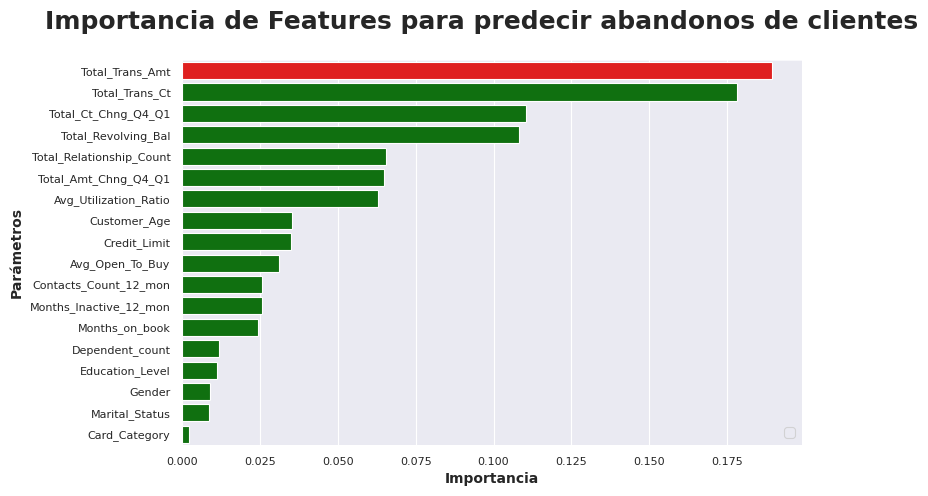

In [1299]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

values = feature_importances.importance   
sns.barplot(y=feature_importances.feature,
            x=values,
            palette=['green' if (x < max(values)) else 'red' for x in values],
            ax=ax)

fig.suptitle("Importancia de Features para predecir abandonos de clientes", fontsize=18, fontweight='bold')
ax.set_xlabel("Importancia", fontsize=10, fontweight='bold')
ax.set_ylabel("Parámetros", fontsize=10, fontweight='bold')
ax.tick_params(labelsize=8)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc="lower right", fontsize=10)

plt.show()


_Esta grafica refleja la importancia de cada categoria, es fundamental entenderla para ver donde estan los puntos claves a la hora de predecir el comportamiento del cliente. Total_Trans_Amt (Importe total de la transacción) es la variable que mayor grado de importancia tiene; mientras que Card_Category (Categoria de tarjeta) la que menos._

In [1300]:
# Selecciono las 10 características más importantes
important_features = feature_importances['feature'][:10].tolist()

In [1301]:
# Agrego nuevamente la columna Attrition Flag
NuevoDF = Bankchurners[important_features + ['Attrition_Flag']]

In [1302]:
NuevoDF.head()

,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age,Credit_Limit,Avg_Open_To_Buy,Attrition_Flag
0,1144,42,1.625,777,5,1.335,0.061,45,12691.0,11914.0,1
1,1291,33,3.714,864,6,1.541,0.105,49,8256.0,7392.0,1
2,1887,20,2.333,0,4,2.594,0.000,51,3418.0,3418.0,1
3,1171,20,2.333,2517,3,1.405,0.760,40,3313.0,796.0,1
4,816,28,2.500,0,5,2.175,0.000,40,4716.0,4716.0,1


In [1303]:
NuevoDF.shape

(10127, 11)

Nuevo DB con las columnas mas relevantes y la variable objetivo (Attrition_Flag)

 ### Validar el modelo con un conjunto de datos de prueba

In [1304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

_Divido los datos en conjuntos de entrenamiento y prueba. En este caso proporciono 70% para el conjunto de entrenamiento y el 30% para el conjunto de prueba._

In [1305]:
#Predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

In [1306]:
# Calculo la precisión, recuperación, puntuación F1 y área bajo la curva ROC
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [1307]:
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 score: ', f1)
print('ROC AUC score: ', roc_auc)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
ROC AUC score:  1.0


In [1308]:
X_test.shape, y_test.shape

((3039, 18), (3039,))

In [1309]:
y_pred.shape

(3039,)

In [1310]:
X_test

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3781,48,1,3,5,2,0,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
2922,59,0,1,5,2,0,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
5070,37,1,2,2,0,0,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
7246,47,0,3,1,0,0,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
623,42,0,3,6,2,0,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6621,49,0,4,3,2,0,30,5,3,3,1579.0,900,679.0,0.592,4354,70,0.707,0.570
9535,39,0,1,2,2,1,36,1,3,2,34516.0,1662,32854.0,0.751,13578,105,0.615,0.048
4638,56,0,2,1,2,0,48,4,3,3,4480.0,2465,2015.0,0.772,3331,74,0.682,0.550
1166,38,1,2,2,1,0,36,6,3,4,2717.0,1591,1126.0,1.596,2064,33,1.062,0.586


**Comparacion predicciones con el DF**

In [1311]:
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [1312]:
y_test[:10].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

_Como se puede observar el valor Y que predijo el modelo es igual al valor Y de la prueba. Todos estos valores son iguales._

Tener un valor de 1.0 en todas las métricas de evaluación como es el caso, puede ser indicativo de un sobreajuste (OVERFITTING) del modelo. Es decir, el modelo está aprendiendo perfectamente los datos de entrenamiento y no hay una verdadera generalización a nuevos datos.

Para verificar si el modelo está sobreajustado, se puede utilizar una técnica llamada "validación cruzada" (cross-validation) que implica dividir los datos en conjuntos de entrenamiento y prueba múltiples veces y evaluar el modelo en cada división. En este caso investigue y me ayude con IA.

### Overfitting

In [1313]:
# Crear el modelo de árbol de decisiones
tree = DecisionTreeClassifier()


In [1314]:
# Realizar validación cruzada de k-fold con k=5
scores = cross_val_score(tree, X, y, cv=5)


_En este caso entrena y evalúa el modelo de árbol de decisiones en cada una de las 5 divisiones de los datos y devuelve la precisión en cada iteración. Luego se calcula la media y la desviación estándar de la precisión para evaluar el modelo de manera más robusta._

In [1315]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.12)


_En conclusion el valor de Accuracy: 0.89 (+/- 0.11) significa que el modelo tiene un promedio de precisión del 89%, con un intervalo de confianza del 11% (DE)._

_Esto significa que el modelo tiene una alta capacidad predictiva, pero que existe cierta incertidumbre en los resultados debido a la variabilidad de los datos. Para reducir el intervalo de confianza se debería considerar ampliar mas la cantidad de datos en la DB._

## Recomendaciones en base a Insights

**Respuestas obtenidas de insights a preguntas/hipotesis:**

**¿Cuál es el impacto del nivel educativo en el salario?**

Según la información analizada, se ha observado que el nivel educativo tiene una influencia relativamente baja en el salario. Para abordar esta cuestión, se podría considerar estrategias que permitan identificar grupos específicos que puedan ser de interés para el banco. Por ejemplo, se ha notado que hay un bajo número de clientes con postgrados o doctorados, lo que indica que estos grupos son minoritarios en la población general. Por otro lado, se podría enfocar la atención en los graduados, ya que son un grupo con una alta concentración de clientes.

**¿Existe alguna influencia del género en el salario y/o límite de crédito?**

De acuerdo con el análisis realizado, se ha encontrado que, en general, las mujeres tienen un límite de crédito menor que los hombres en la mayoría de los rangos de edad. Para abordar esta cuestión, es necesario revisar los criterios utilizados para determinar el límite de crédito otorgado a cada persona, con el objetivo de evitar que el género sea un factor determinante.

**¿Qué género tiene más probabilidades de abandonar el banco?**

En cuanto a la cuestión de la tasa de abandono del banco según el género, se ha observado que la tasa de abandono es similar entre hombres y mujeres. En consecuencia, no se puede concluir que haya una relación clara entre el género y la probabilidad de abandono del banco. Sin embargo, dado que la mayoría de los clientes son mujeres y que éstas tienen un límite de crédito menor en general, se podrían tomar medidas específicas para aprovechar este grupo y evitar su posible abandono.

**¿Los estudios superiores implican más responsabilidades con su cuenta?**

Según la información analizada, se ha encontrado que, en general, las personas con estudios superiores tienden a interactuar menos con el banco. En este sentido, sería conveniente diseñar estrategias que permitan atraer a este grupo de clientes, ya que los postgraduados y doctorados sólo representan el 9% de la cartera de clientes.

**¿Un mayor ingreso implica menos deudas?**

En cuanto a la relación entre el ingreso y la deuda, se ha observado que, en general, las personas que realizan más transacciones tienden a continuar operando con el banco, mientras que aquellas que no interactúan tanto suelen dar de baja el servicio. Por lo tanto, sería importante identificar a los clientes que interactúan menos con el banco para analizar su comportamiento y comprender mejor los factores que pueden llevarlos a abandonar el servicio.

**¿Qué hace que una persona abandone el banco?**

De acuerdo con el análisis realizado mediante el modelo de árbol de decisiones, se ha observado que la variable que tiene mayor importancia en la predicción del comportamiento de los clientes es el importe total de la transacción. Asimismo, la cantidad total de transacciones también es una variable importante en la toma de decisiones, ya que representa aproximadamente el 36-37% de la predicción del comportamiento del cliente. Por otro lado, variables como el género, el estado civil y la categoría de tarjeta son irrelevantes para predecir el comportamiento del cliente.
De esta manera se deberian adoptar estrategias para captar esas posibles personas que abandonarian el servicio bancario y buscar retenerlas mediante acciones de marketing.